## Cargamos librerias necesarias

In [2]:
pip install pandas numpy matplotlib scikit-learn xgboost openpyxl

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 2.3 MB/s eta 0:00:25
   - -------------------------------------- 2.1/56.8 MB 4.9 MB/s eta 0:00:12
   -- ------------------------------------- 3.4/56.8 MB 5.2 MB/s eta 0:00:11
   --- ------------------------------------ 5.0/56.8 MB 5.7 MB/s eta 0:00:10
   ---- ----------------------------------- 6.0/56.8 MB 5.7 MB/s eta 0:00:09
   ----- ---------------------------------- 7.6/56.8 MB 5.9 MB/s eta 0:00:09
   ------ --------------------------------- 9.7/56.8 MB 6.4 MB/s eta 0:00:08
   -------- ------------------------------- 11.5/56.8 MB 6.7 MB/s eta 0:00:07
   --------- ------------------------------ 13.1/56.8 MB 6.8 MB/s eta 0:00:07
   ---------- ----------------------------- 15.2/56.8 MB 7.2 MB/s eta 0:00:06
   ----------- ---------------------------- 16.3/56.8 MB 7.0 MB/s eta 0:00:06
   ------

## Importamos las librerias

In [3]:
import os, zipfile, re
import pandas as pd
import numpy as np
from IPython.display import display

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

## Cargo los datasets, ambos

In [11]:
df_agencia = pd.read_csv("datos_agencia.csv")
df_ny = pd.read_csv("datos_new_york.csv")

print("Agencia ->", df_agencia.shape)
print("Nueva York ->", df_ny.shape)

display(df_agencia.head())
display(df_ny.head())


Agencia -> (13, 6)
Nueva York -> (48882, 17)


,Unnamed: 0,neighbourhood_group,neighbourhood,latitude,longitude,room_type
0,18401,Manhattan,Midtown,40.75380,-73.97139,Entire home/apt
1,18582,Manhattan,Midtown,40.75294,-73.97330,Entire home/apt
2,18905,Manhattan,Midtown,40.75233,-73.97137,Private room
3,19110,Manhattan,Midtown,40.75326,-73.97303,Entire home/apt
4,19111,Manhattan,Midtown,40.75368,-73.97358,Private room


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48882 non-null  int64  
 1   id                              48882 non-null  int64  
 2   name                            48866 non-null  object 
 3   host_id                         48882 non-null  int64  
 4   host_name                       48861 non-null  object 
 5   neighbourhood_group             48882 non-null  object 
 6   neighbourhood                   48882 non-null  object 
 7   latitude                        48882 non-null  float64
 8   longitude                       48882 non-null  float64
 9   room_type                       48882 non-null  object 
 10  price                           48882 non-null  int64  
 11  minimum_nights                  48882 non-null  int64  
 12  number_of_reviews               

## Exploro los precios de los diferentes apt y los agrupo por grupos

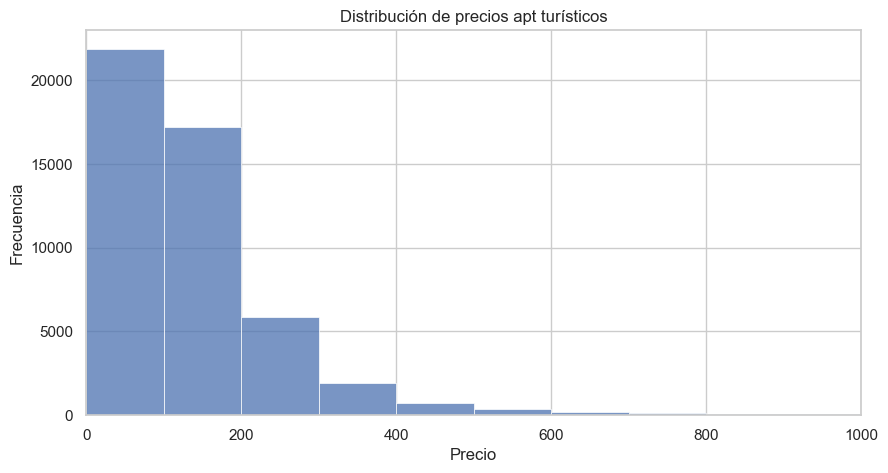

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df_ny["price"], bins=100, kde=False)
plt.xlim(0, 1000)  # cortamos a 1000 para evitar outliers extremos
plt.title("Distribución de precios apt turísticos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


## Priorizo datos, borro columnas o valores irrelevantes

In [20]:

df_ny = df_ny[(df_ny["price"] > 10) & (df_ny["price"] < 1000)]


df_ny["reviews_per_month"] = df_ny["reviews_per_month"].fillna(0)


cols_drop = ["id", "name", "host_id", "host_name", "last_review"]
df_ny = df_ny.drop(columns=cols_drop)

print("Shape después de limpieza:", df_ny.shape)


Shape después de limpieza: (48556, 12)


## Hago un análisis exploratorio (precios por tipo, y por barrio)

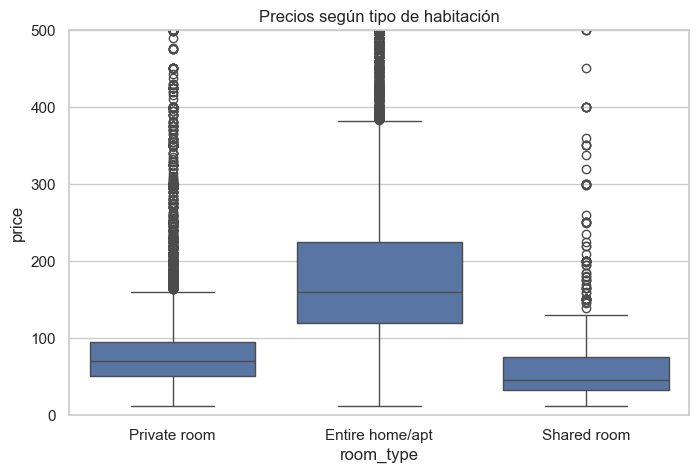

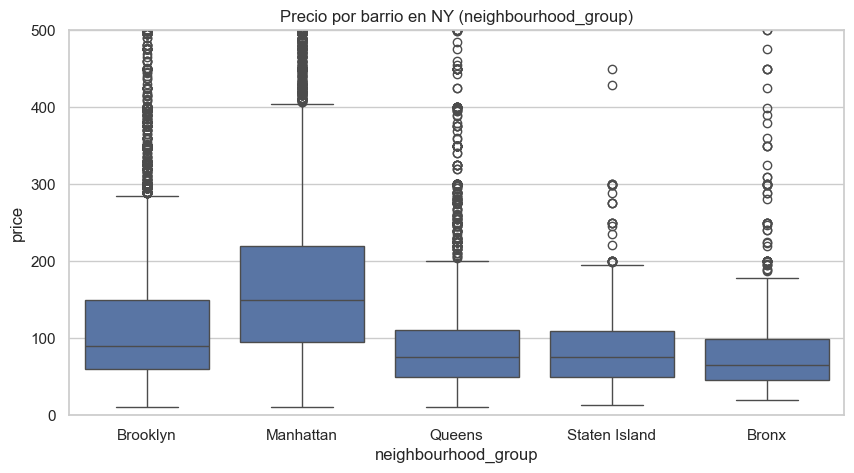

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_ny, x="room_type", y="price")
plt.ylim(0, 500)  # cortar outliers
plt.title("Precios según tipo de habitación")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_ny, x="neighbourhood_group", y="price")
plt.ylim(0, 500)
plt.title("Precio por barrio en NY (neighbourhood_group)")
plt.show()

## Ahora preparo los datos para el modelo

In [28]:
from sklearn.model_selection import train_test_split

df_model = pd.get_dummies(df_ny, columns=["neighbourhood_group", "neighbourhood", "room_type"], drop_first=True)

X = df_model.drop("price", axis=1)
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, " Test:", X_test.shape)

Train: (38844, 234)  Test: (9712, 234)


## Entreno el modelo de predicción de precios

In [31]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("MAE del modelo:", mae)

MAE del modelo: 47.526068780889624


## ME APARECE UNA DESVIACIÓN DE PRECIO DE 47,50 DÓLARES POR NOCHE

## Y ahora generamos un csv con los pregios sugeridos! 

In [30]:

df_agencia_encoded = pd.get_dummies(df_agencia, columns=["neighbourhood_group", "neighbourhood", "room_type"], drop_first=True)

df_agencia_encoded = df_agencia_encoded.reindex(columns=X.columns, fill_value=0)

df_agencia["precio_sugerido"] = model.predict(df_agencia_encoded)

display(df_agencia)

,Unnamed: 0,neighbourhood_group,neighbourhood,latitude,longitude,room_type,precio_sugerido
0,18401,Manhattan,Midtown,40.75380,-73.97139,Entire home/apt,210.93
1,18582,Manhattan,Midtown,40.75294,-73.97330,Entire home/apt,189.56
2,18905,Manhattan,Midtown,40.75233,-73.97137,Private room,121.14
3,19110,Manhattan,Midtown,40.75326,-73.97303,Entire home/apt,175.34
4,19111,Manhattan,Midtown,40.75368,-73.97358,Private room,113.34
5,19112,Manhattan,Midtown,40.75324,-73.97217,Entire home/apt,182.52
6,19216,Manhattan,Midtown,40.75310,-73.97321,Private room,112.21
7,19952,Manhattan,Midtown,40.75230,-73.97288,Private room,113.92
8,19984,Manhattan,Midtown,40.75220,-73.97285,Entire home/apt,182.07
9,20027,Manhattan,Midtown,40.75246,-73.97356,Entire home/apt,174.48


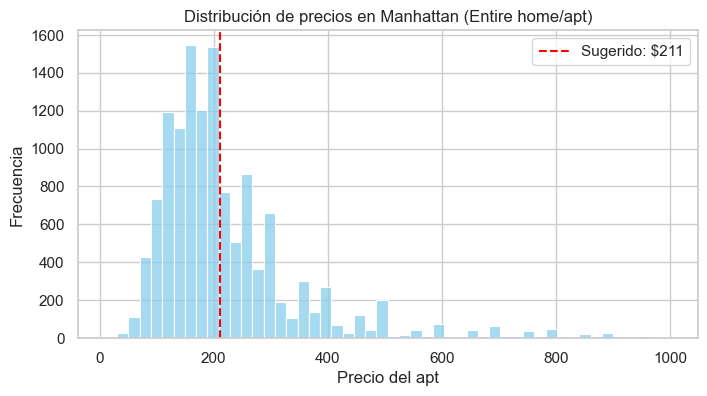

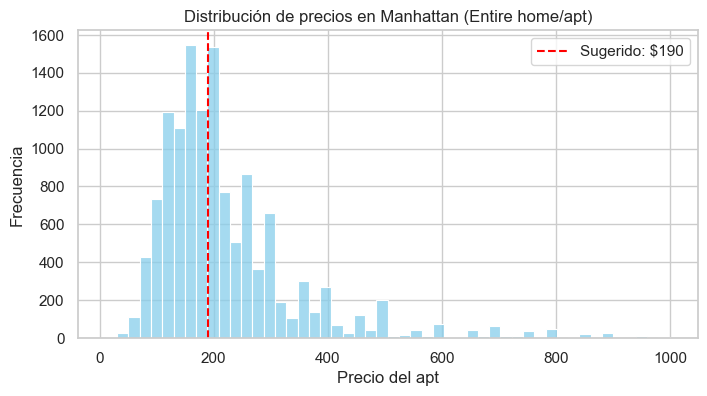

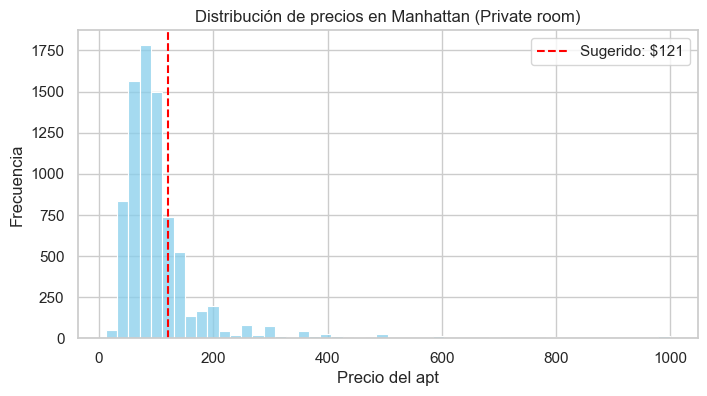

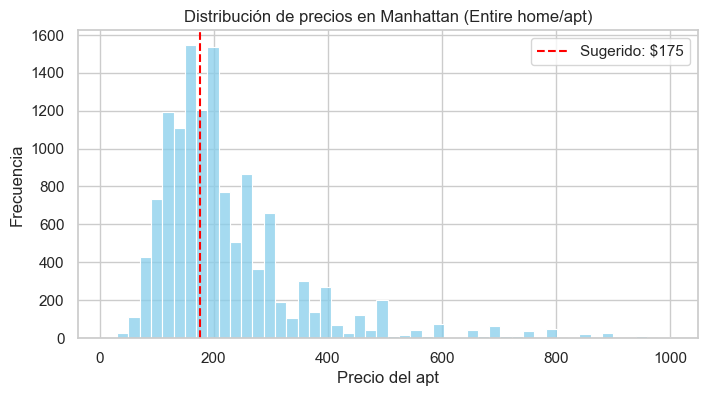

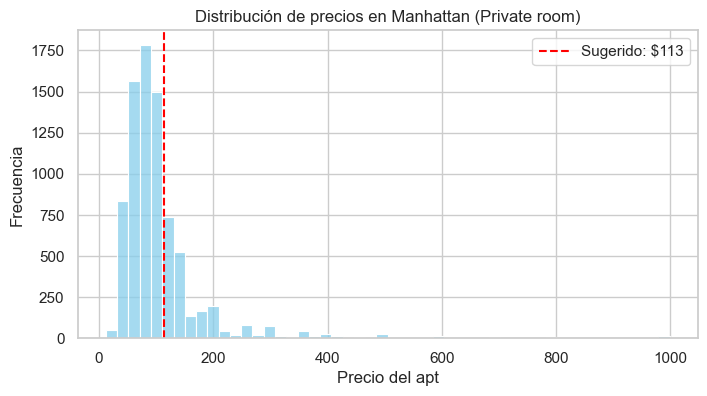

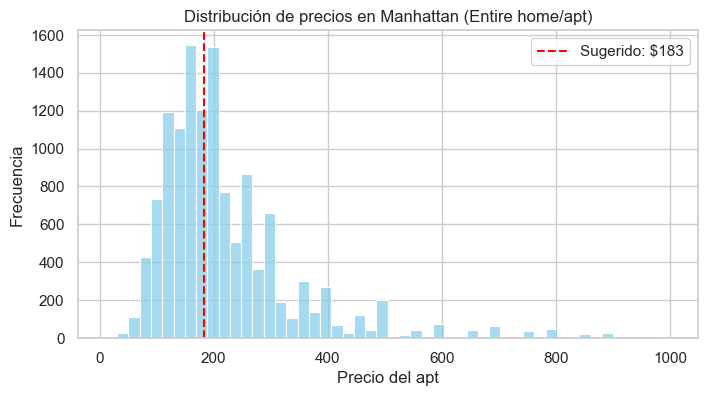

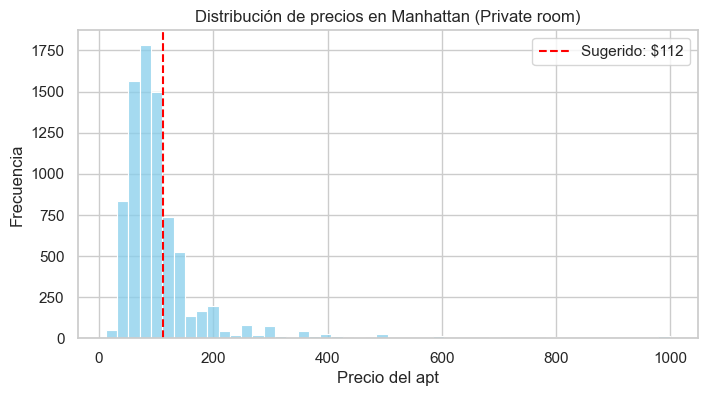

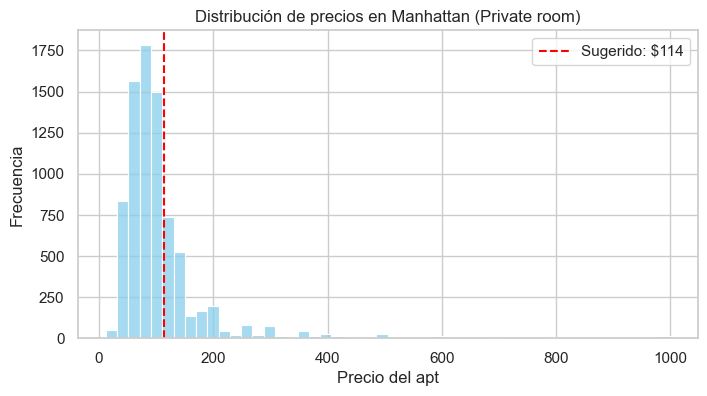

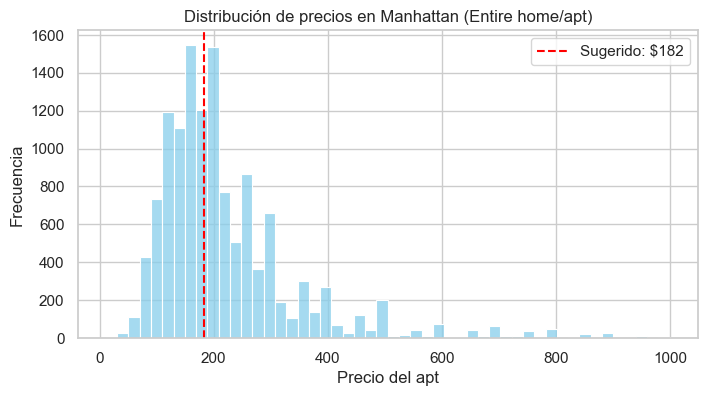

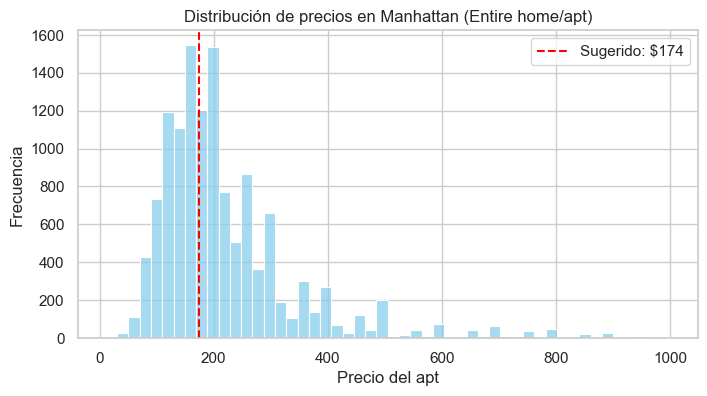

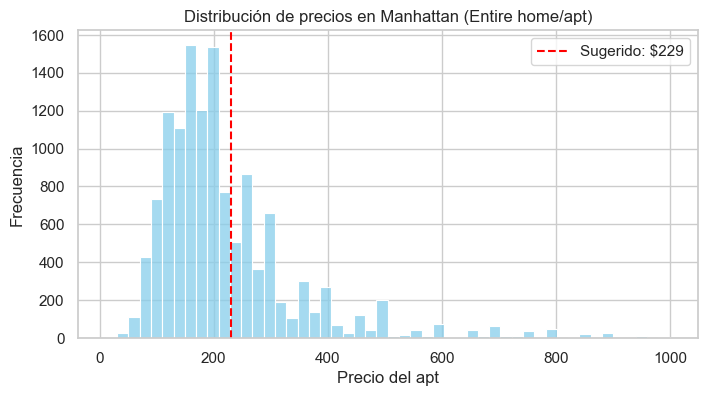

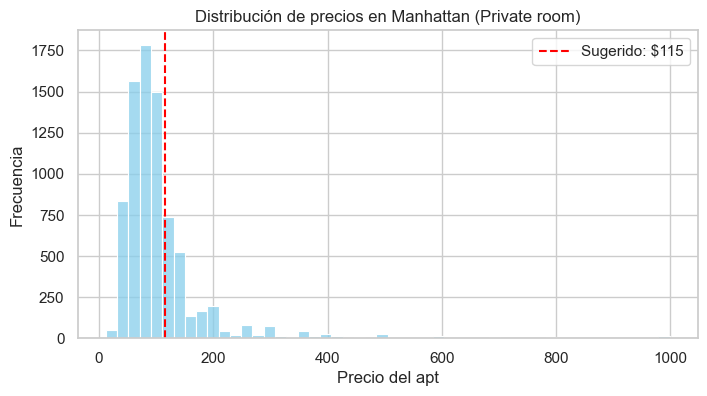

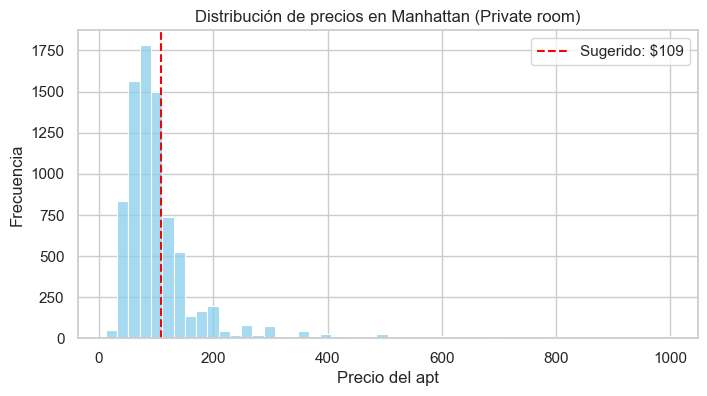

In [35]:
for i, row in df_agencia.iterrows():
    barrio = row["neighbourhood_group"]
    room = row["room_type"]
    precio_sugerido = row["precio_sugerido"]

    plt.figure(figsize=(8,4))
    subset = df_ny[(df_ny["neighbourhood_group"] == barrio) & (df_ny["room_type"] == room)]
    sns.histplot(subset["price"], bins=50, color="skyblue")
    plt.axvline(precio_sugerido, color="red", linestyle="--", label=f"Sugerido: ${precio_sugerido:.0f}")
    plt.title(f"Distribución de precios en {barrio} ({room})")
    plt.xlabel("Precio del apt")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()


## HE HECHO GRÁFICAS SEGÚN EL TIPO DE APARTAMENTO Y BARRIO, TENIENDO EN CUANTA PRECIOS INDIVIDUALES. LA LÍNEA ROJA ES E PRECIO SUGERIDO SEGÚN BARRIO Y TIPO DE APARTAMENTO

## Hago un csv con los resultados

In [36]:
df_agencia.to_csv("precios_sugeridos_agencia.csv", index=False)

## CONCLUSIONES DEL ANÁLISIS 49 k DE REGISTROS

###
- Se detectaron y limpiaron outliers en la variable de precio.
- Se entrenó un modelo RandomForest con un MAE ≈ 47 USD, lo cual implica un error razonable dado el rango de precios.
- El modelo permitió sugerir precios personalizados para las 13 propiedades de la agencia, considerando:
  - El barrio (`neighbourhood_group`)
  - La localización (`latitude`, `longitude`)
  - El tipo de habitación (`room_type`)
  - Características adicionales como disponibilidad y número de reviews.
- Los precios sugeridos se compararon con la distribución de precios del mercado, asegurando coherencia.